In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import pickle

In [2]:
data=pd.read_csv('nearest-earth-objects(1910-2024).csv')

In [3]:
data

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.140,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.500,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.450,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.630,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.700,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False
...,...,...,...,...,...,...,...,...,...
338194,54403809,(2023 VS4),28.580,0.005112,0.011430,Earth,56646.985988,6.406548e+07,False
338195,54415298,(2023 XW5),28.690,0.004859,0.010865,Earth,21130.768947,2.948883e+07,False
338196,54454871,(2024 KJ7),21.919,0.109839,0.245607,Earth,11832.041031,5.346078e+07,False
338197,54456245,(2024 NE),23.887,0.044377,0.099229,Earth,56198.382733,5.184742e+06,False


In [4]:
data=data.drop(['name','neo_id','orbiting_body'],axis=1)

In [5]:
data.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07,False
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07,True
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,False
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,False
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,False


In [6]:
data.shape

(338199, 6)

In [7]:
data.describe

<bound method NDFrame.describe of         absolute_magnitude  estimated_diameter_min  estimated_diameter_max  \
0                   19.140                0.394962                0.883161   
1                   18.500                0.530341                1.185878   
2                   21.450                0.136319                0.304818   
3                   20.630                0.198863                0.444672   
4                   22.700                0.076658                0.171412   
...                    ...                     ...                     ...   
338194              28.580                0.005112                0.011430   
338195              28.690                0.004859                0.010865   
338196              21.919                0.109839                0.245607   
338197              23.887                0.044377                0.099229   
338198              22.951                0.068290                0.152700   

        relative_velocity  mi

In [8]:
data=data.dropna()

In [9]:
data.isnull().sum()

absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

In [10]:
data.drop_duplicates(inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_1184\2282015914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


In [11]:
data.duplicated().sum()

np.int64(0)

In [12]:
data.shape

(338166, 6)

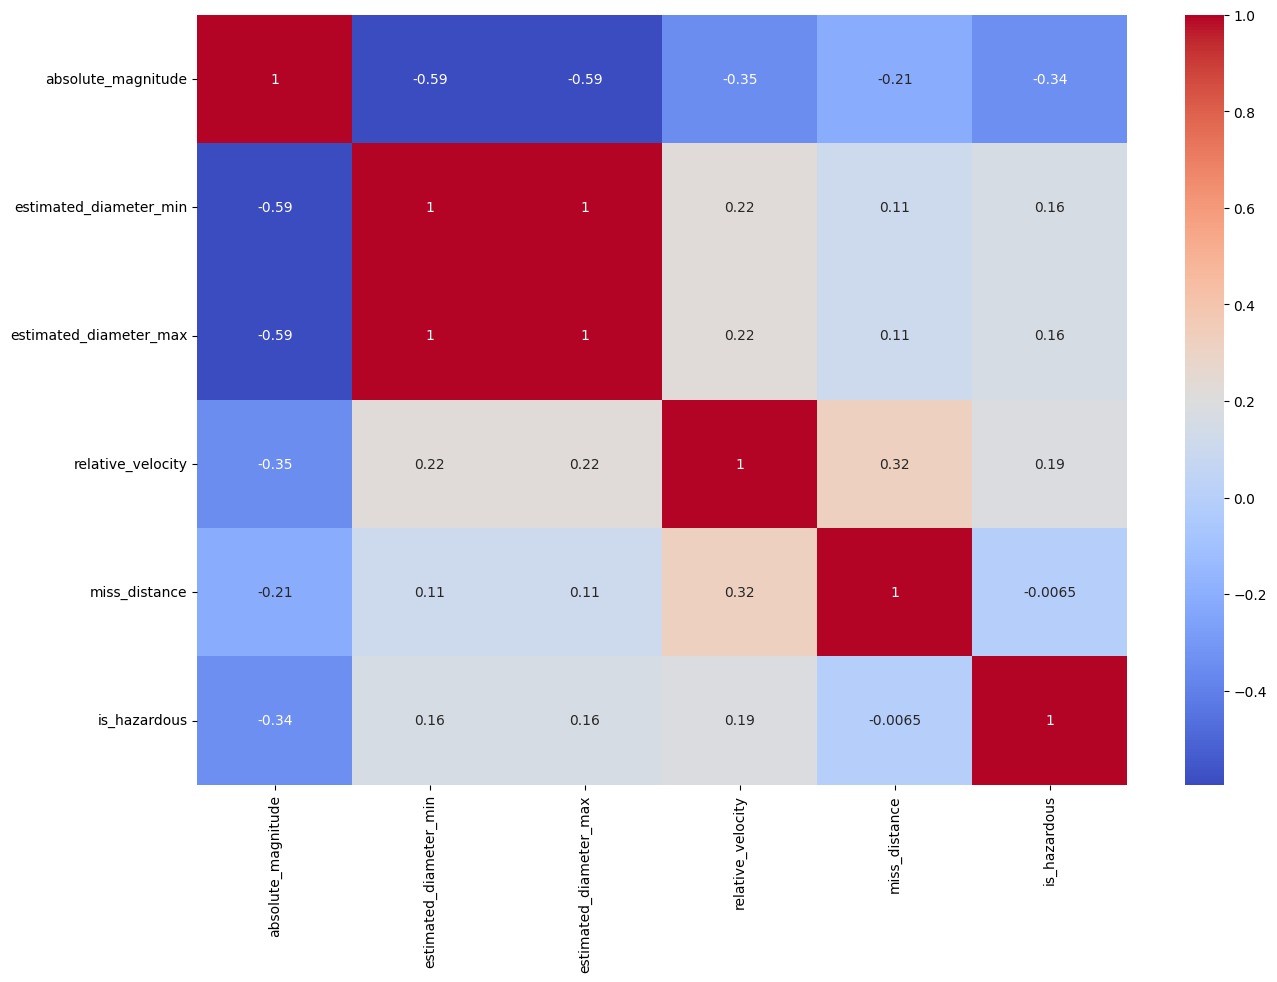

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.show()

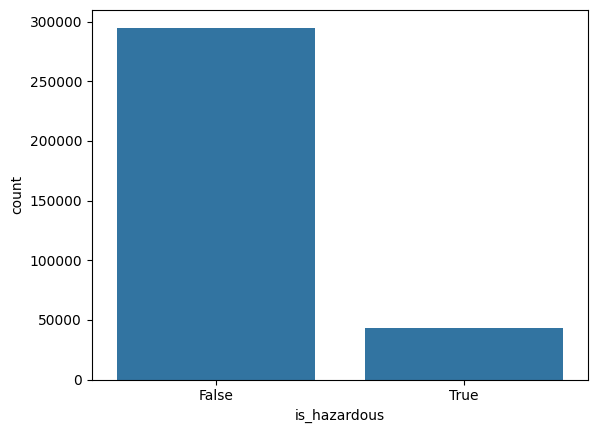

In [14]:
sns.countplot(x='is_hazardous', data=data)
plt.show()

In [15]:
data['is_hazardous'].value_counts()

is_hazardous
False    295004
True      43162
Name: count, dtype: int64

In [16]:
not_nearest = data[data['is_hazardous'] == 0]

In [17]:
nearest = data[data['is_hazardous'] == 1]

In [18]:
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

In [19]:
def remove_outliers(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

In [20]:
data = remove_outliers(not_nearest, numeric_columns)

In [21]:
rows_removed = not_nearest.shape[0] - data.shape[0]

In [22]:
rows_removed

50113

In [23]:
data.shape

(244891, 6)

In [24]:
df = pd.concat([data, nearest])

In [25]:
df.shape

(288053, 6)

In [26]:
x=df.drop(columns=['is_hazardous'])
y=df['is_hazardous']

In [27]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

scale = MinMaxScaler()
X= scale.fit_transform(x)

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [29]:
model = RandomForestClassifier(n_estimators=200,class_weight='balanced', random_state=2)

In [30]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=2)

In [31]:
y_pred = model.predict(X_test)

In [32]:
report=classification_report(y_test, y_pred,output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

,precision,recall,f1-score,support
0,0.959025,0.977215,0.968035,48980.000000
1,0.855103,0.763063,0.806465,8631.000000
accuracy,0.945132,0.945132,0.945132,0.945132
macro avg,0.907064,0.870139,0.887250,57611.000000
weighted avg,0.943456,0.945132,0.943829,57611.000000


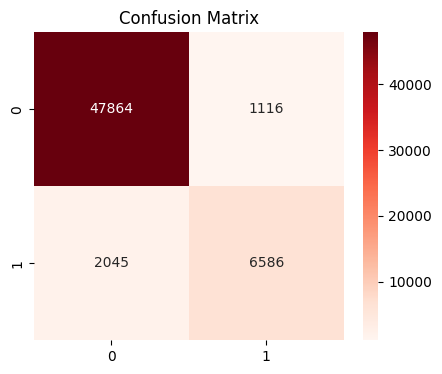

In [33]:
confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds")
plt.title('Confusion Matrix')
plt.show()

In [36]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [38]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scale, f)